In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

In [2]:
def rd(x,y=0):
    ''' A classical mathematical rounding by Voznica '''
    try:
        m = int('1'+'0'*y) # multiplier - how many positions to the right
        q = x*m # shift to the right by multiplier
        c = int(q) # new number
        i = int( (q-c)*10 ) # indicator number on the right
        if i >= 5:
            c += 1
        result = '{num:.{prec}f}'.format(num=c/m,prec=y)
    except:
        result = ''
    return result

In [3]:
# dodělat možnost na procenta do 100% a label na osu
def getBarChart(df, columns = [], type='v', precision=0, title='Graf', label='Osa', width=0.8, rotation=0, figsize=(5, 5), html=False):
    '''Tato funkce vytváří grafy s popisky hodnot'''
    cols = []
    if len(columns) > 0:
        for i, column in enumerate(columns):
            #raise error if not found
            cols.append(df.columns.get_loc(column))
    else:
        for i, column in enumerate(df.columns):
            #raise error if not found
            cols.append(df.columns.get_loc(column))
    ind = np.arange(len(df.index))
    if type == 'h' or type == 'hr' or type == 'v' or type == 'vr':
        if type == 'v' or type == 'vr':
            fig, ax = plt.subplots(figsize = figsize)
            rectss = []
            bottom = np.zeros(len(df.index))
            for i in range(len(cols)):
                if type == 'v':
                    rectss.append(plt.bar(x=df.index, height=df[df.columns[cols[i]]], bottom=bottom, width=width, label=df.columns[cols[i]]))
                    bottom += np.array(df[df.columns[cols[i]]])
                else:
                    rectss.append(plt.bar(x=df.index[::-1], height=df[df.columns[cols[i]]][::-1], bottom=bottom, width=width, label=df.columns[cols[i]]))
                    bottom += np.array(df[df.columns[cols[i]]][::-1])
            bottom = np.zeros(len(df.index))
            for rects in rectss:
                bott = []
                for i, rect in enumerate(rects):
                    if len(cols) == 1:
                        ax.annotate(text=rd(rect.get_height(), precision), xy=(rect.get_x() + rect.get_width()/2, rect.get_height()), ha='center', va='bottom')
                    else:
                        ax.annotate(text=rd(rect.get_height(), precision), xy=(rect.get_x() + rect.get_width()/2, rect.get_height()/2 + bottom[i]), ha='center', va='center')
                    bott.append(rect.get_height())
                bottom += np.array(bott)
            if rotation > 0 and rotation < 90:
                plt.xticks(rotation = rotation, rotation_mode='anchor', ha='right')
            else:
                plt.xticks(rotation = rotation)
            plt.ylabel(label)
        if type == 'h' or type == 'hr':
            fig, ax = plt.subplots(figsize = figsize)
            rectss = []
            bottom = np.zeros(len(df.index))
            for i in range(len(cols)):
                if type == 'h':
                    rectss.append(plt.barh(y=df.index, width=df[df.columns[cols[i]]], left=bottom, height=width, label=df.columns[cols[i]]))
                    bottom += np.array(df[df.columns[cols[i]]])
                else:
                    rectss.append(plt.barh(y=df.index[::-1], width=df[df.columns[cols[i]]][::-1], left=bottom, height=width, label=df.columns[cols[i]]))
                    bottom += np.array(df[df.columns[cols[i]]][::-1])
            bottom = np.zeros(len(df.index))
            for rects in rectss:
                bott = []
                for i, rect in enumerate(rects):
                    if len(cols) == 1:
                        ax.annotate(text=rd(rect.get_width(),precision), xy=(rect.get_width()+bottom[i], rect.get_y()+rect.get_height()/2), ha='left', va='center')
                    else:
                        ax.annotate(text=rd(rect.get_width(),precision), xy=(rect.get_width()/2+bottom[i], rect.get_y()+rect.get_height()/2), ha='center', va='center')
                    bott.append(rect.get_width())
                bottom += np.array(bott)
            if rotation < 0 or rotation > 90:
                plt.yticks(rotation = rotation, rotation_mode='anchor', ha='right')
            else:
                plt.yticks(rotation = rotation)
            plt.xlabel(label)
        plt.title(title)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1), ncol=1, fancybox=True, shadow=True)
        #plt.show()
        if html:
            buf = BytesIO()
            fig.savefig(buf, format="png", bbox_inches='tight')
            # Embed the result in the html output.
            data = base64.b64encode(buf.getbuffer()).decode("ascii")
            return f"<img src='data:image/png;base64,{data}'/>"
    else:
        raise Exception("Sorry, wrong type(only accept 'h', 'hr', 'v', 'vr')")

In [4]:
df = pd.DataFrame({'Boys': [67, 78],
                         'Girls': [72, 80], },
                        index=['First Year', 'Second Year'])
df

,Boys,Girls
First Year,67,72
Second Year,78,80


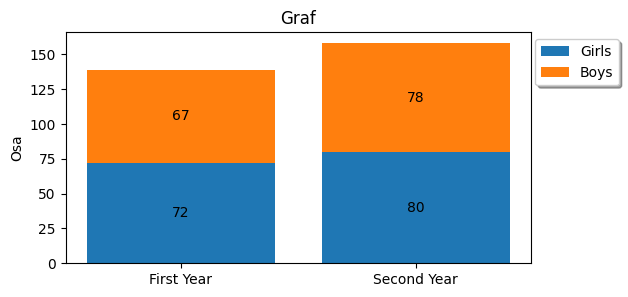

In [20]:
#columns = [], type='v', precision=0, title='Graf', label='Osa', width=0.8, rotation=0, figsize=(5, 5), html=False
html = getBarChart(df, columns=['Girls', 'Boys'], type='v', width=0.8, figsize=(6,3), html=True)

In [17]:
from ipywidgets import widgets, Layout, HBox, HTML
HTML(html)

HTML(value="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApsAAAE8CAYAAACPY3qvAAAAOnRFWHRTb2Z0d2FyZQ…

In [14]:
html